In [ ]:
import matplotlib.ticker as ticker
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

In [ ]:
df["ratings_cnt_ya"].fillna(0, inplace=True)
df["reviews_cnt_yell"].fillna(0, inplace=True)
df["reviews_cnt_2gis"].fillna(0, inplace=True)
df["reviews_cnt_avito"].fillna(0, inplace=True)

df["rating_ya"].fillna(0, inplace=True)
df["rating_yell"].fillna(0, inplace=True)
df["rating_2gis"].fillna(0, inplace=True)
df["rating_avito"].fillna(0, inplace=True)
df["reviews_cnt"] = df["ratings_cnt_ya"] + df["reviews_cnt_2gis"] + df["reviews_cnt_yell"] + df["reviews_cnt_avito"]
df["reviews_cnt"].replace(0, 1, inplace=True)
df = df.dropna(subset=['ratings_cnt_ya', 'reviews_cnt_yell', "reviews_cnt_2gis", "reviews_cnt_avito"], how='all')

df["rating"] = (df["rating_ya"] * df["ratings_cnt_ya"] + df["rating_2gis"] * df["reviews_cnt_2gis"] + df["rating_yell"] * df["reviews_cnt_yell"] + df["rating_avito"] * df["reviews_cnt_avito"])\
                /df["reviews_cnt"]
df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)

#df = df[(df["rating"] > 0) & (df["rating"] < 5)]

<ipython-input-212-3fbcb76015ff>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)


# data analyze

## Основные показатели

In [ ]:
print(df.describe())

         phones_num     phb_fraud     phb_dirty   phb_all_bad       phb_all  \
count  15000.000000  14989.000000  14989.000000  14989.000000  1.498900e+04   
mean      12.604400      2.914471      1.564147      4.478618  4.121914e+03   
std      151.777264     51.679676     27.827962     76.850102  6.013156e+04   
min        1.000000      0.000000      0.000000      0.000000  1.000000e+00   
25%        1.000000      0.000000      0.000000      0.000000  2.290000e+02   
50%        2.000000      0.000000      0.000000      0.000000  6.630000e+02   
75%        4.000000      0.000000      0.000000      0.000000  1.551000e+03   
max     8090.000000   4326.000000   2867.000000   7193.000000  5.693618e+06   

       phb_bad_perc  found_phones  phb_fraud_dir  phb_dirty_dir  \
count  14989.000000  14989.000000   13769.000000   13769.000000   
mean       0.108629     10.444726       0.406275       0.248602   
std        0.898938    132.272592       6.027714       2.372826   
min        0.000000 

In [ ]:
res_lst = []
for i in df.columns:
    res_lst.append((15000 - df[i].describe()[0]) / 15000 * 100)

sr = pd.Series(res_lst, df.columns)[1::]
print(sr)

phones_num                   0.000000
phb_fraud                    0.073333
phb_dirty                    0.073333
phb_all_bad                  0.073333
phb_all                      0.073333
phb_bad_perc                 0.073333
found_phones                 0.073333
phb_fraud_dir                8.206667
phb_dirty_dir                8.206667
phb_all_bad_dir              8.206667
phb_all_dir                  8.206667
phb_bad_perc_dir             8.206667
found_phones_dir             8.206667
claims_percent              34.013333
claims_num                  34.013333
appl_num                    34.013333
complaints_num              99.880000
complaints_num_dir          99.693333
mvd_request_num             93.320000
bad_rep_tcb                 99.153333
total_case_cnt              99.573333
total_defendant_case_cnt    99.573333
total_defendant_case_amt    99.573333
defendant_case_perc         99.573333
rating_ya                   77.360000
ratings_cnt_ya              70.153333
reviews_cnt_

<ipython-input-184-5a2bb8c3d35e>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  res_lst.append((15000 - df[i].describe()[0]) / 15000 * 100)


In [ ]:
sr = sr.sort_values()

In [ ]:
import matplotlib

Text(0, 0.5, 'Название столбца')

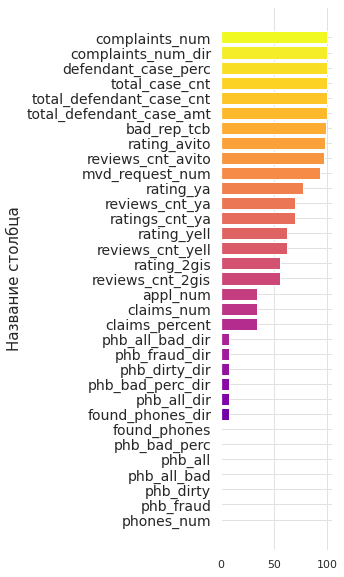

In [ ]:
turbo_cm = matplotlib.cm.get_cmap('plasma')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(sr))]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(2)
labels = sr.index
ax.set_facecolor('white')
plt.grid(color = '#E1E1E1') #  Вертикальное выравнивание
plt.barh(sr.index, list(sr), color=colors)
plt.rc('ytick', labelsize= 14) 
plt.ylabel('Название столбца', fontsize=15)

In [ ]:
# res_lst = []
# for i in df.columns:
#     res_lst.append(df[i].to_list().count(0))

# sr = pd.Series(res_lst, df.columns)[1::]
# print(sr)

res_lst = []
for i in df.columns[1::]:
    Q1 = df[i].quantile(q=.25) # персентили
    Q3 = df[i].quantile(q=.75)
    IQR = Q3 - Q1

    res = 0
    for j in df[i]:
        if j >= Q1 - 1.5*IQR and j <= Q3 + 1.5*IQR:
            res += 1

    res_lst.append(res / df[i].describe()[0] * 100)

sr = pd.Series(res_lst, df.columns[1::])
print(sr)

phones_num                   89.146667
phb_fraud                    87.751017
phb_dirty                    89.425579
phb_all_bad                  81.479752
phb_all                      90.426313
phb_bad_perc                 81.559811
found_phones                 90.439656
phb_fraud_dir                91.016051
phb_dirty_dir                92.163556
phb_all_bad_dir              85.598083
phb_all_dir                  91.771370
phb_bad_perc_dir             85.598083
found_phones_dir             96.927881
claims_percent               99.191756
claims_num                   99.191756
appl_num                     95.514245
complaints_num               94.444444
complaints_num_dir           80.434783
mvd_request_num              93.213573
bad_rep_tcb                  81.102362
total_case_cnt               92.187500
total_defendant_case_cnt     85.937500
total_defendant_case_amt     84.375000
defendant_case_perc         100.000000
rating_ya                    90.135453
ratings_cnt_ya           

In [ ]:
sr = sr.sort_values()

In [ ]:
grad_lst = ["#00FF00",
            "#00EE00",
            "#00DD00",
            "#00CC00",
            "#00BB00",
            "#00AA00",
            "#009900",
            "#008800",
            "#007700",
            "#006600",
            "#005500",
            "#004400",
            "#003300",
            "#002200",
            "#001100",
            "#110000",
            "#220000",
            "#330000",
            "#440000",
            "#550000",
            "#660000",
            "#770000",
            "#880000",
            "#990000",
            "#AA0000",
            "#BB0000",
            "#CC0000",
            "#DD0000",
            "#EE0000",
            "#FF0000"]

print(len(grad_lst))
c = np.zeros((33, 3))
for i in range(33):
    c[i][1] = 1 / 33 * i
    c[i][0] = 1 - 1 / 33 * i
print(c)

30
[[1.         0.         0.        ]
 [0.96969697 0.03030303 0.        ]
 [0.93939394 0.06060606 0.        ]
 [0.90909091 0.09090909 0.        ]
 [0.87878788 0.12121212 0.        ]
 [0.84848485 0.15151515 0.        ]
 [0.81818182 0.18181818 0.        ]
 [0.78787879 0.21212121 0.        ]
 [0.75757576 0.24242424 0.        ]
 [0.72727273 0.27272727 0.        ]
 [0.6969697  0.3030303  0.        ]
 [0.66666667 0.33333333 0.        ]
 [0.63636364 0.36363636 0.        ]
 [0.60606061 0.39393939 0.        ]
 [0.57575758 0.42424242 0.        ]
 [0.54545455 0.45454545 0.        ]
 [0.51515152 0.48484848 0.        ]
 [0.48484848 0.51515152 0.        ]
 [0.45454545 0.54545455 0.        ]
 [0.42424242 0.57575758 0.        ]
 [0.39393939 0.60606061 0.        ]
 [0.36363636 0.63636364 0.        ]
 [0.33333333 0.66666667 0.        ]
 [0.3030303  0.6969697  0.        ]
 [0.27272727 0.72727273 0.        ]
 [0.24242424 0.75757576 0.        ]
 [0.21212121 0.78787879 0.        ]
 [0.18181818 0.81818182 0

([<matplotlib.axis.XTick at 0x7fe7eec811c0>,
 <a list of 3 Text major ticklabel objects>)

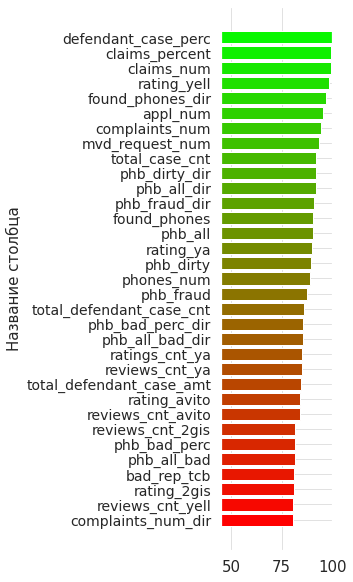

In [ ]:
turbo_cm = matplotlib.cm.get_cmap('PiYG')
colors = [turbo_cm(v) for v in np.linspace(0,1,len(sr))]

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(2)
labels = sr.index
ax.set_facecolor('white')
plt.grid(color = '#E1E1E1') #  Вертикальное выравнивание
plt.barh(sr.index, list(sr), color=c)
plt.rc('ytick', labelsize= 14) 
plt.ylabel('Название столбца', fontsize=15)
plt.xlim([45, 100])
plt.xticks(np.arange(50, 101, step=25), size=15)

In [ ]:
def remove_fliers(df, colums, a1=1, a2=1):
    df_clean = df
    for c in colums:
        Q1 = df_clean[c].quantile(q=.25) # квартели
        Q3 = df_clean[c].quantile(q=.75)
        IQR = Q3 - Q1  # Межквартильный размах  
        df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))] 
        # Фильтрация данных
    return df_clean

df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "appl_num"
colums = ["appl_num"]
df_clean = remove_fliers(df[df["appl_num"] > 0], colums)

KeyboardInterrupt: ignored

In [ ]:
print(df_clean[data].describe())

count    9220.000000
mean        2.999892
std         1.335839
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: appl_num, dtype: float64


In [ ]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "appl_num"

colms = [data]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [ ]:
print(df_clean[data].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: appl_num, dtype: float64


## phb_all

In [ ]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "phb_all"

colms = [data]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]


In [ ]:
print(df_clean[data])

id
a7717043113a    2262.0
a7722377866a     641.0
a7802849641a    1269.0
a6165033136a    1326.0
a3445042160a    3369.0
                 ...  
a5032269927a     260.0
a9729123737a     169.0
a2310108400a     275.0
a7728054910a     395.0
a7710045520a       1.0
Name: phb_all, Length: 13553, dtype: float64


In [ ]:
print(phb_series)

id
a782615660478a     2.0
a7706752171a       0.0
a745212602258a     0.0
a2466264323a       0.0
a7801329625a      76.0
                  ... 
a390609289521a     0.0
a560206225313a     0.0
a503610997836a     0.0
a212406459136a     0.0
a502503908452a     0.0
Name: phb_all_bad, Length: 13553, dtype: float64


In [ ]:
print(df[data].describe())

count    1.498900e+04
mean     4.121914e+03
std      6.013156e+04
min      1.000000e+00
25%      2.290000e+02
50%      6.630000e+02
75%      1.551000e+03
max      5.693618e+06
Name: phb_all, dtype: float64


In [ ]:
print(df_clean2[data2].describe())

count    2382.000000
mean        3.402603
std         3.209924
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        15.000000
Name: phb_all_bad, dtype: float64


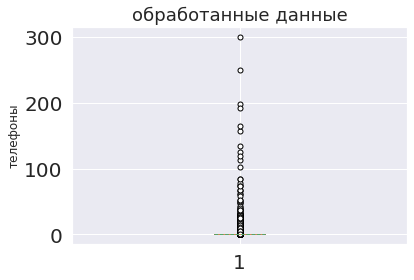

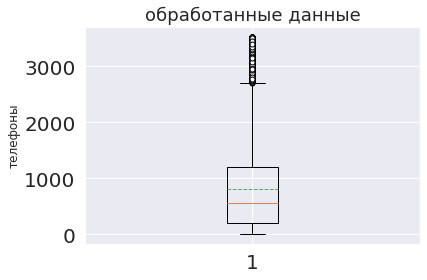

In [ ]:
flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )

fig = plt.figure()
plt.title("обработанные данные", fontsize=18)
plt.ylabel("телефоны")
plt.boxplot(df_clean[data], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()

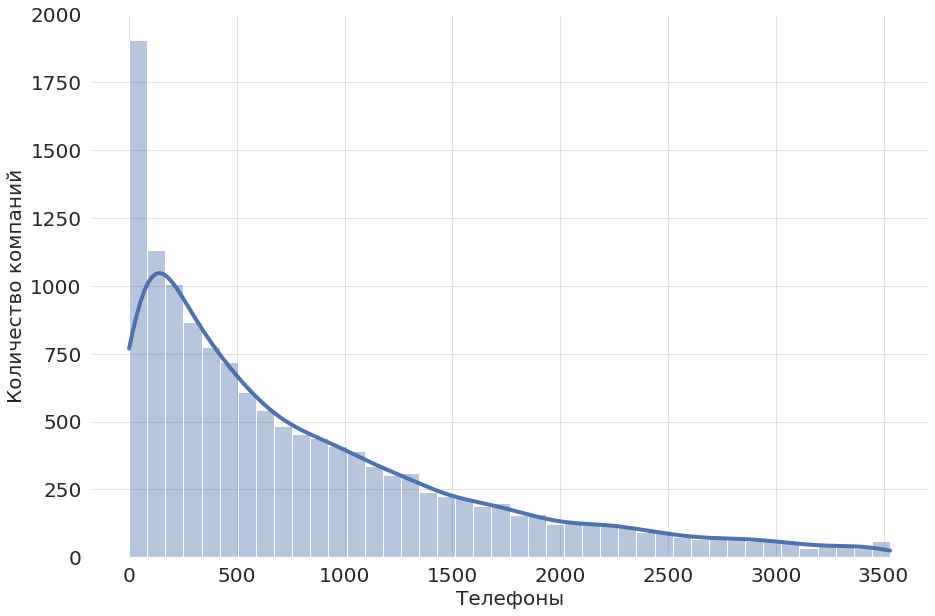

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(df_clean[data], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Телефоны', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

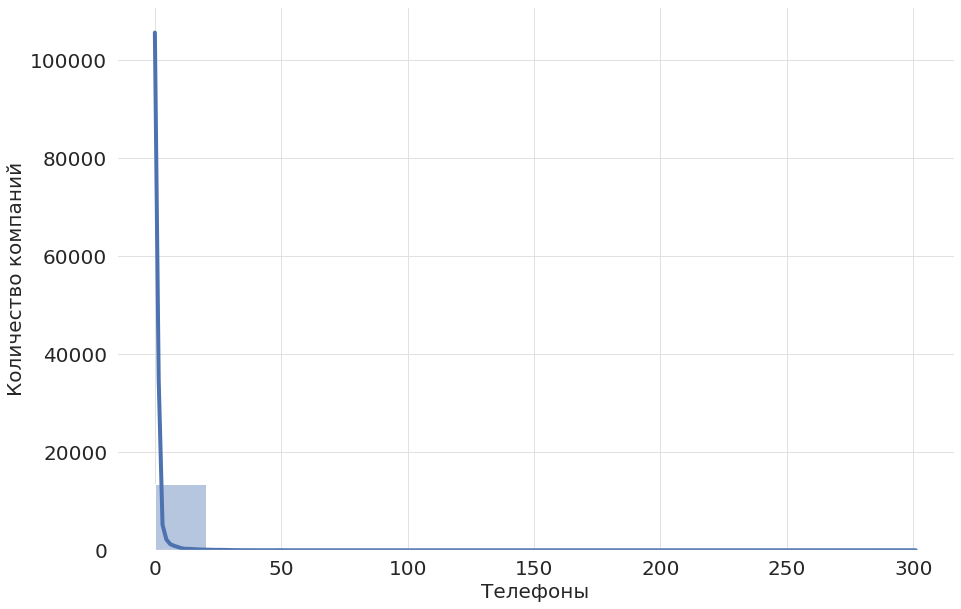

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(phb_series, kde=True, alpha=0.4)
#sns.histplot(df_clean2[data2], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Телефоны', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

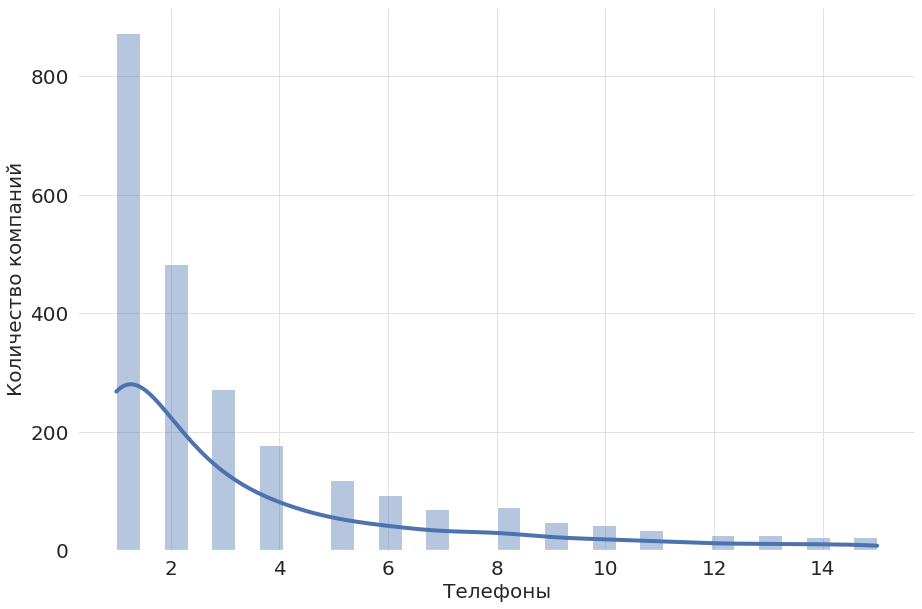

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

#sns.histplot(df_clean[data], kde=True, alpha=0.4)
sns.histplot(df_clean2[data2], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Телефоны', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

## rating

In [ ]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

df["ratings_cnt_ya"].fillna(0, inplace=True)
df["reviews_cnt_yell"].fillna(0, inplace=True)
df["reviews_cnt_2gis"].fillna(0, inplace=True)
df["reviews_cnt_avito"].fillna(0, inplace=True)

df["rating_ya"].fillna(0, inplace=True)
df["rating_yell"].fillna(0, inplace=True)
df["rating_2gis"].fillna(0, inplace=True)
df["rating_avito"].fillna(0, inplace=True)
df["reviews_cnt"] = df["ratings_cnt_ya"] + df["reviews_cnt_2gis"] + df["reviews_cnt_yell"] + df["reviews_cnt_avito"]
df["reviews_cnt"].replace(0, 1, inplace=True)
df = df.dropna(subset=['ratings_cnt_ya', 'reviews_cnt_yell', "reviews_cnt_2gis", "reviews_cnt_avito"], how='all')

df["rating"] = (df["rating_ya"] * df["ratings_cnt_ya"] + df["rating_2gis"] * df["reviews_cnt_2gis"] + df["rating_yell"] * df["reviews_cnt_yell"] + df["rating_avito"] * df["reviews_cnt_avito"])\
                /df["reviews_cnt"]
df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)

df = df[(df["rating"] > 0) & (df["rating"] < 5)]
data = 'rating'
colms = ["rating"]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

<ipython-input-30-f3b7ceefecfa>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0]["rating"] = df[df["ratings_cnt_ya"] + df["reviews_cnt_yell"] + df["reviews_cnt_2gis"] + df["reviews_cnt_avito"] == 0][["rating_ya", "rating_yell", "rating_2gis", "rating_avito"]].max(axis=1)


In [ ]:
print(df['rating'].describe())

count    3953.000000
mean        3.809319
std         0.998095
min         0.000722
25%         3.700000
50%         4.126857
75%         4.370000
max         4.997542
Name: rating, dtype: float64


In [ ]:
print(df_clean['rating'].describe())

count    3476.000000
mean        4.128023
std         0.449548
min         2.700000
25%         3.913289
50%         4.200000
75%         4.400000
max         4.997542
Name: rating, dtype: float64


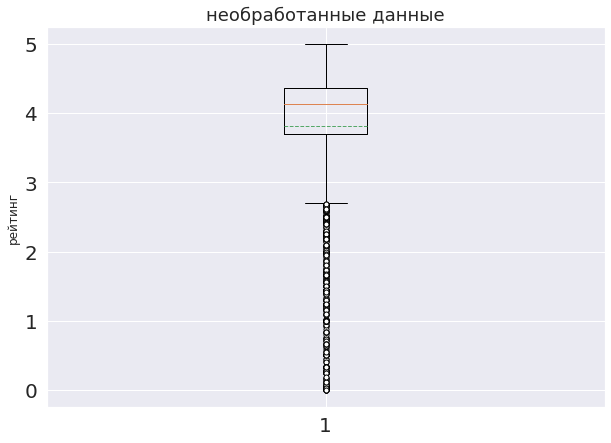

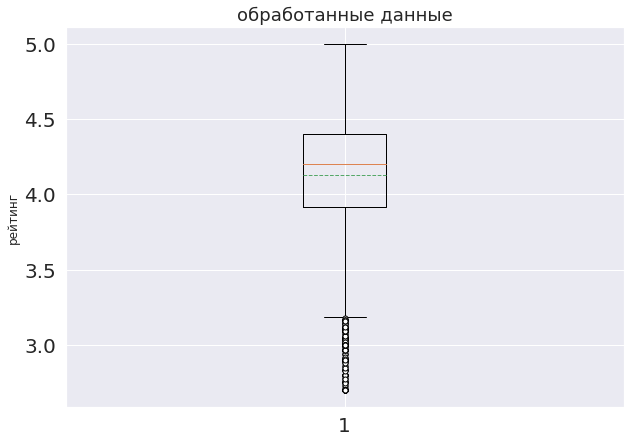

In [ ]:
fig = plt.figure(figsize =(10, 7))

flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )
plt.boxplot(df["rating"], flierprops=flierprops, meanline=True, showmeans=True)
plt.ylabel("рейтинг")
plt.title("необработанные данные", fontsize=18)

plt.show()

fig = plt.figure(figsize =(10, 7))
plt.title("обработанные данные", fontsize=18)
plt.ylabel("рейтинг")
plt.boxplot(df_clean["rating"], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()

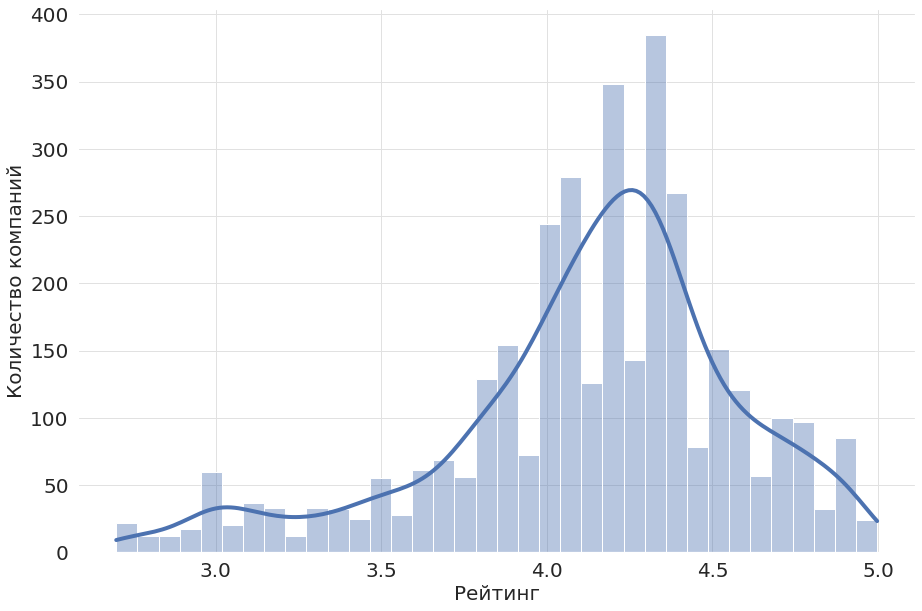

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(df_clean[data], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Рейтинг', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

## mvd_request_num

In [ ]:
df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "mvd_request_num"

colms = [data]
df_clean = df
for c in colms:
    Q1 = df_clean[c].quantile(q=.25) # персентили
    Q3 = df_clean[c].quantile(q=.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))]

In [ ]:
print(df_clean)

                     date  phones_num  phb_fraud  phb_dirty  phb_all_bad  \
id                                                                         
a7710140679a   2022-10-26         449      734.0      432.0       1166.0   
a7714617793a   2022-08-26         368       90.0      151.0        241.0   
a7714617793a   2020-12-10         368       26.0       36.0         62.0   
a7118018781a   2022-03-05         284        7.0        1.0          8.0   
a7713011336a   2022-08-15         212      184.0      115.0        299.0   
...                   ...         ...        ...        ...          ...   
a505203889525a 2022-07-06           1        0.0        0.0          0.0   
a7813484463a   2022-08-29           1        0.0        0.0          0.0   
a5408166650a   2022-09-17           2        0.0        0.0          0.0   
a745110157216a 2021-05-23           1        0.0        0.0          0.0   
a861712124625a 2022-08-23           1        0.0        0.0          0.0   

           

In [ ]:
print(df[data].describe())

count    1002.000000
mean        4.073852
std        71.580115
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2252.000000
Name: mvd_request_num, dtype: float64


In [ ]:
print(df_clean[data].describe())

count    934.000000
mean       1.277302
std        0.554799
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: mvd_request_num, dtype: float64


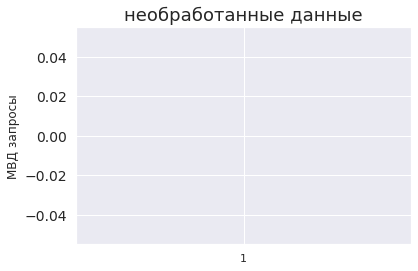

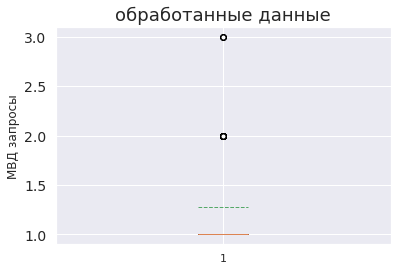

In [ ]:
fig = plt.figure()

flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )
plt.boxplot(df[data], flierprops=flierprops)
plt.ylabel("МВД запросы")
plt.title("необработанные данные", fontsize=18)

plt.show()

fig = plt.figure()
plt.title("обработанные данные", fontsize=18)
plt.ylabel("МВД запросы")
plt.boxplot(df_clean[data], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()

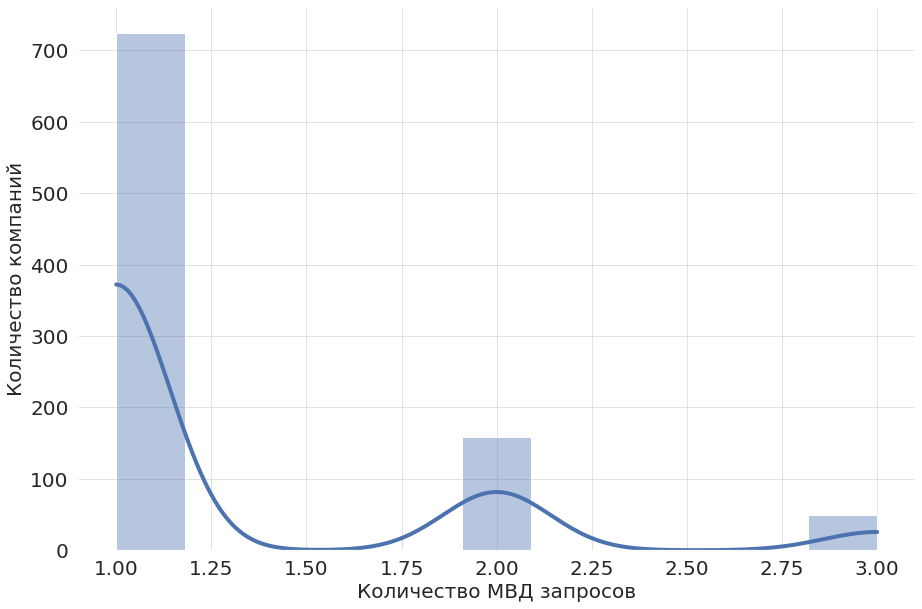

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(df_clean[data], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Количество МВД запросов', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

## phb_bad_perc

In [ ]:
def remove_fliers(df, colums, a1=1, a2=1):
    df_clean = df
    for c in colums:
        Q1 = df_clean[c].quantile(q=.25) # квартели
        Q3 = df_clean[c].quantile(q=.75)
        IQR = Q3 - Q1  # Межквартильный размах  
        df_clean = df_clean[(df_clean[c] > (Q1-1.5*IQR)) & ((df_clean[c] < (Q3+1.5*IQR)))] 
        # Фильтрация данных
    return df_clean

df = pd.pandas.read_excel(r'data/tinkoff_legal_entities_new.xlsx', index_col="id")

data = "phb_bad_perc"
colums = ["appl_num", "phb_bad_perc"]
df_clean = remove_fliers(df[df["phb_bad_perc"] > 0], colums)

In [ ]:
print(df[data].describe())

count    14989.000000
mean         0.108629
std          0.898938
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: phb_bad_perc, dtype: float64


In [ ]:
print(df_clean[data].describe())

count    1402.000000
mean        0.296612
std         0.298673
min         0.010000
25%         0.080000
50%         0.175000
75%         0.420000
max         1.340000
Name: phb_bad_perc, dtype: float64


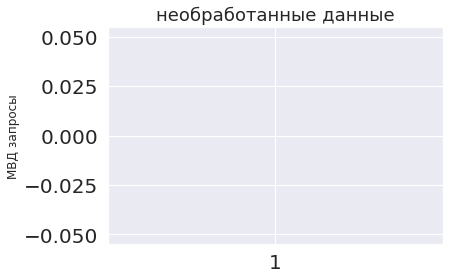

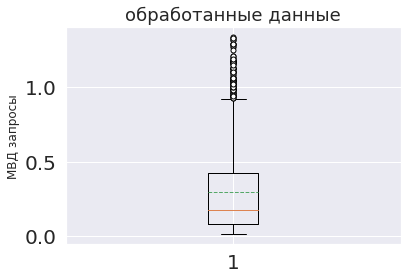

In [ ]:
fig = plt.figure()

flierprops = dict(marker='o', markerfacecolor='white', markersize=5,
                  linestyle='none', )
plt.boxplot(df[data], flierprops=flierprops)
plt.ylabel("МВД запросы")
plt.title("необработанные данные", fontsize=18)

plt.show()

fig = plt.figure()
plt.title("обработанные данные", fontsize=18)
plt.ylabel("МВД запросы")
plt.boxplot(df_clean[data], flierprops=flierprops, meanline=True, showmeans=True)

plt.show()

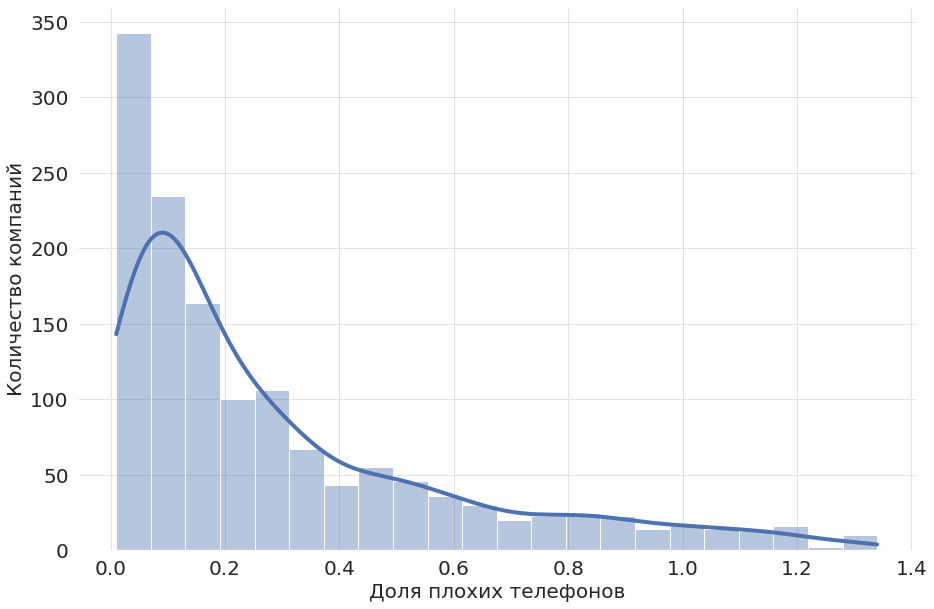

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.histplot(df_clean[data], kde=True, alpha=0.4)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.xlabel('Доля плохих телефонов', fontsize=20)
plt.ylabel('Количество компаний', fontsize=20)
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)

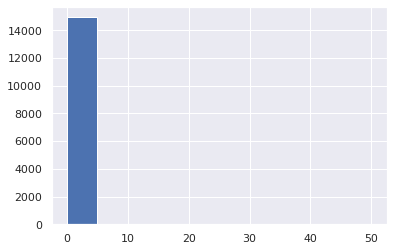

In [ ]:
h = df[data].hist()
fig = h.get_figure()

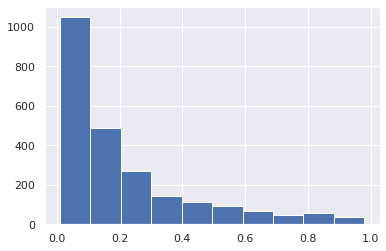

In [ ]:
h = df_clean[data].hist()
fig = h.get_figure()

## Добавление уверенности

In [ ]:
df["confidence"] = (1 / (df["mvd_request_num"] + 1) + (100 - df["phb_bad_perc"]) / 100 + 1 / (df["mvd_request_num"] + 1) * (100 - df["phb_bad_perc"]) / 100) / 3

colms = ["confidence"]
df_clean = df
data = "confidence"
for c in colms:
    Q1 = df_clean[df_clean[c] < 1][c].quantile(q=.25) 
    Q3 = df_clean[df_clean[c] < 1][c].quantile(q=.75)
    IQR = Q3 - Q1
    print(Q1, IQR, Q3)
    df_clean = df_clean[(df_clean[c] >= (Q1-1.5*IQR))]

0.5555555555555555 0.11111111111111116 0.6666666666666666


In [ ]:
print(df_clean)

                Unnamed: 0                 date  phones_num  phb_fraud  \
id                                                                       
a782615660478a           0  2022-10-30 00:00:00           1        0.0   
a7839394165a            39  2021-06-03 00:00:00           1        0.0   
a181302601451a          46  2022-11-04 00:00:00           2        0.0   
a352523677425a         103  2021-06-03 00:00:00           8        0.0   
a7701616048a           157  2022-04-06 00:00:00          15        0.0   
...                    ...                  ...         ...        ...   
a4712027521a         14817  2022-05-27 00:00:00           1        0.0   
a5003111163a         14840  2021-10-29 00:00:00           1        0.0   
a1821010900a         14866  2022-08-29 00:00:00           1        0.0   
a526201345926a       14884  2022-05-25 00:00:00           1        0.0   
a861712124625a       14990  2022-08-23 00:00:00           1        0.0   

                phb_dirty  phb_all_ba

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


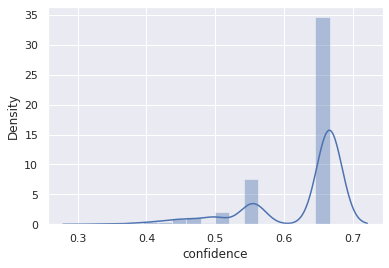

In [ ]:
sns_plot = sns.distplot(df['confidence'])
fig = sns_plot.get_figure()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


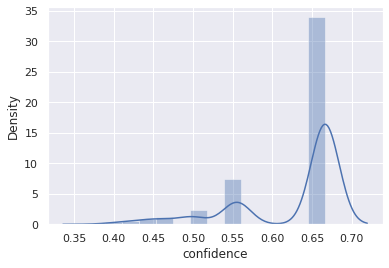

In [ ]:
sns_plot = sns.distplot(df_clean[data])
fig = sns_plot.get_figure()

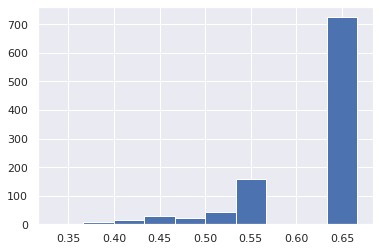

In [ ]:
h = df[data].hist()
fig = h.get_figure()

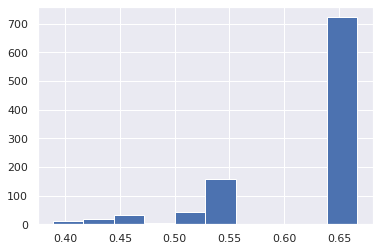

In [ ]:
h = df_clean[data].hist()
fig = h.get_figure()

## Матрица корелляции

In [ ]:
lst = ['phones_num', 'mvd_request_num', 'rating', 'appl_num', 'phb_bad_perc_dir', 'phb_bad_perc', 'phb_all']
df_new = pd.concat([df[i] for i in lst], axis=1)
df_new

,phones_num,mvd_request_num,rating,appl_num,phb_bad_perc_dir,phb_bad_perc,phb_all
id,,,,,,,
a7704340310a,8090,4.0,4.238478,22.0,0.00,0.13,5693618.0
a2310031475a,5871,NaN,4.071254,NaN,0.00,0.04,166846.0
a7704252261a,4783,NaN,1.556578,1.0,0.37,0.06,2003534.0
a7704252261a,4783,NaN,1.556578,1.0,0.43,0.05,1631428.0
a7704252261a,4783,NaN,1.556578,1.0,0.54,0.05,1285678.0
...,...,...,...,...,...,...,...
a7811384657a,1,NaN,2.500000,NaN,0.00,NaN,NaN
a1659194656a,8,NaN,0.000000,NaN,0.00,NaN,NaN
a2508090520a,3,NaN,4.460000,NaN,0.00,NaN,NaN


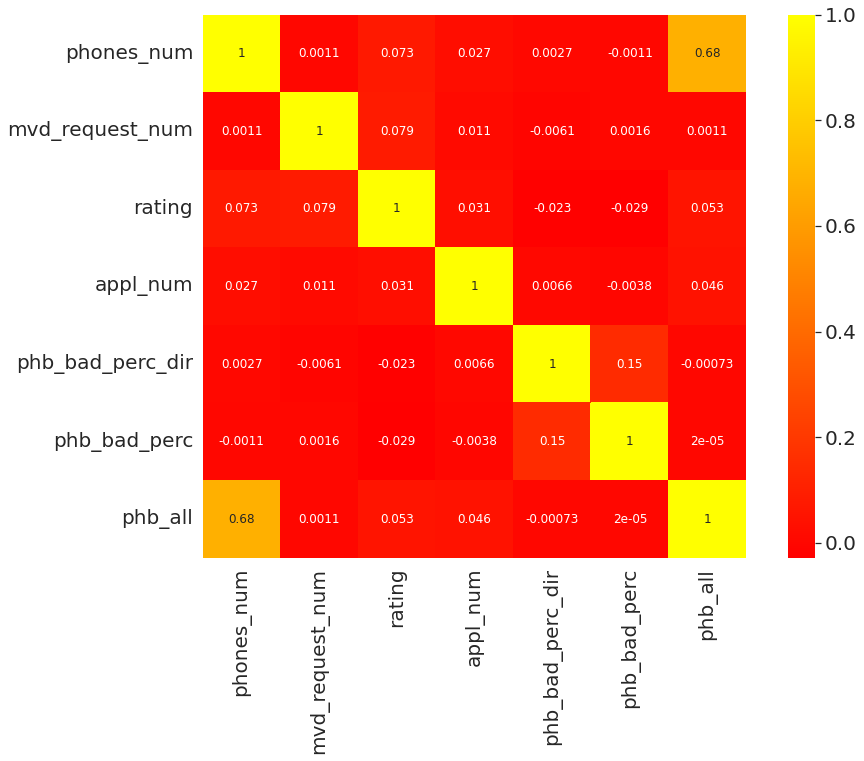

In [ ]:
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)

sns.heatmap(df_new.corr(), annot = True, cmap='autumn', square=True)

ax.set_facecolor('white')
plt.grid(color = '#E1E1E1')
plt.rc('xtick', labelsize= 20) 
plt.rc('ytick', labelsize= 20) 
plt.rc('lines', linewidth= 4)